In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[112 113 111 ... 115 116 114]
 [115 116 116 ... 118 117 119]
 [117 118 119 ... 119 119 121]
 ...
 [ 60  59  65 ... 184 211 212]
 [ 47  52  60 ... 151 183 204]
 [ 54  57  56 ... 164 194 193]]


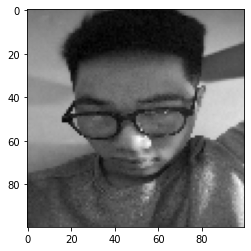

In [14]:
datadir = "/content/drive/MyDrive/AI/faceid"
categories=['Quoc Huy','Thanh Nhan','Phu Hung']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [15]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 30/30 [00:24<00:00,  1.24it/s]

90


In [16]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (90, 100, 100, 1)
y (90,)


In [17]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI/faceid/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI/faceid/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [18]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [20]:
pickle_in = open("/content/drive/MyDrive/AI/faceid/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI/faceid/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (90, 100, 100, 1)
y (90,)


In [21]:
y= to_categorical(y,3)

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))

In [23]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=10,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/10
2/2 [==============================] - 9s 1s/step - loss: 5.2907 - accuracy: 0.3827 - val_loss: 7.6970e-04 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 4s 1s/step - loss: 5.7037 - accuracy: 0.2716 - val_loss: 2.9908 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 5s 1s/step - loss: 1.1914 - accuracy: 0.4815 - val_loss: 1.3033 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 4s 1s/step - loss: 0.9387 - accuracy: 0.4321 - val_loss: 0.4698 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 4s 1s/step - loss: 0.7837 - accuracy: 0.5926 - val_loss: 2.3551 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 4s 1s/step - loss: 0.7222 - accuracy: 0.7778 - val_loss: 0.1940 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 4s 1s/step - loss: 0.4469 - accuracy: 0.8642 - val_loss: 0.3366 - val_accuracy: 0.8889
Epoch 8/10
2/2 [=========

In [24]:
model.save('FaceID.h5')

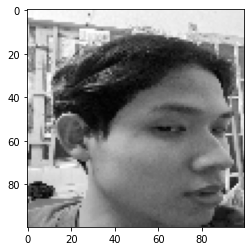

In [26]:
img_test='/content/drive/MyDrive/AI/faceid/Thanh Nhan/Thanh Nhan 10.jpg'
categories=['Quoc Huy','Thanh Nhan','Phu Hung']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

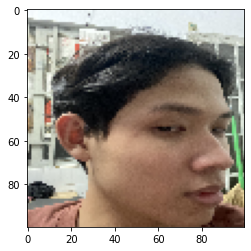

Prediction value Thanh Nhan


In [27]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

[[0. 0. 1.]]
expectation Phu Hung


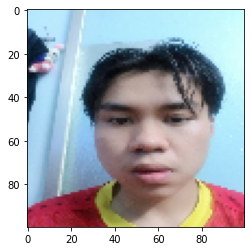

In [28]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Quoc Huy',
          1: 'Thanh Nhan', 
          2: 'Phu Hung',   
          }
model = load_model('FaceID.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI/faceid/Phu Hung/Phu Hung 1.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])